## Nama : Khairunisa Olive Ektha
## NPM : 24083010120

## **Parameter dan Modifikasi Model (Tugas 1 & 2)**
---
### 1. Parameter Pribadi yang Digunakan (Tugas 1)
Model disesuaikan dengan preferensi pribadi dan menambahkan faktor baru (Tugas 2).

#### Waktu Istirahat (istirahat)
- Waktu tidur aktual: **4 jam** (Sangat rendah, secara ilmiah tidak sehat).

#### Puncak Preferensi Kuliah
- Target waktu kuliah ideal: **7.5 jam**.

#### Puncak Preferensi Main/Olahraga
- Target waktu main/olahraga ideal: **2.0 jam**.

#### Bobot Prioritas
- **Kuliah**: 60%
- **Main**: 40%
---

### 2. Implementasi Faktor Baru (Tugas 2)
Karena waktu istirahat hanya 4 jam, yang secara ilmiah sangat tidak sehat, ditambahkan **Penalti Defisit Tidur** tetap sebesar **−5.0** ke fungsi objektif **Z**.

#### Fungsi Objektif Baru
$Z_{\text{baru}} = Z_{\text{awal}} + (-5.0)$

Penalti ini memastikan model mencerminkan risiko kesehatan yang tinggi, sesuai dengan analisis.

---

## **2. Kode Program dan Hasil Numerik (Tugas 1a & 3)**
---

--- Hasil Optimum Numerik ---
Istirahat harian: 4 jam
Sumbu X, Y maksimal: 20 jam
Titik Optimum (Kuliah, Main): (6.86 jam, 0.08 jam)
Nilai Quality of Life Maksimum (Khusus Sehat): 4.97


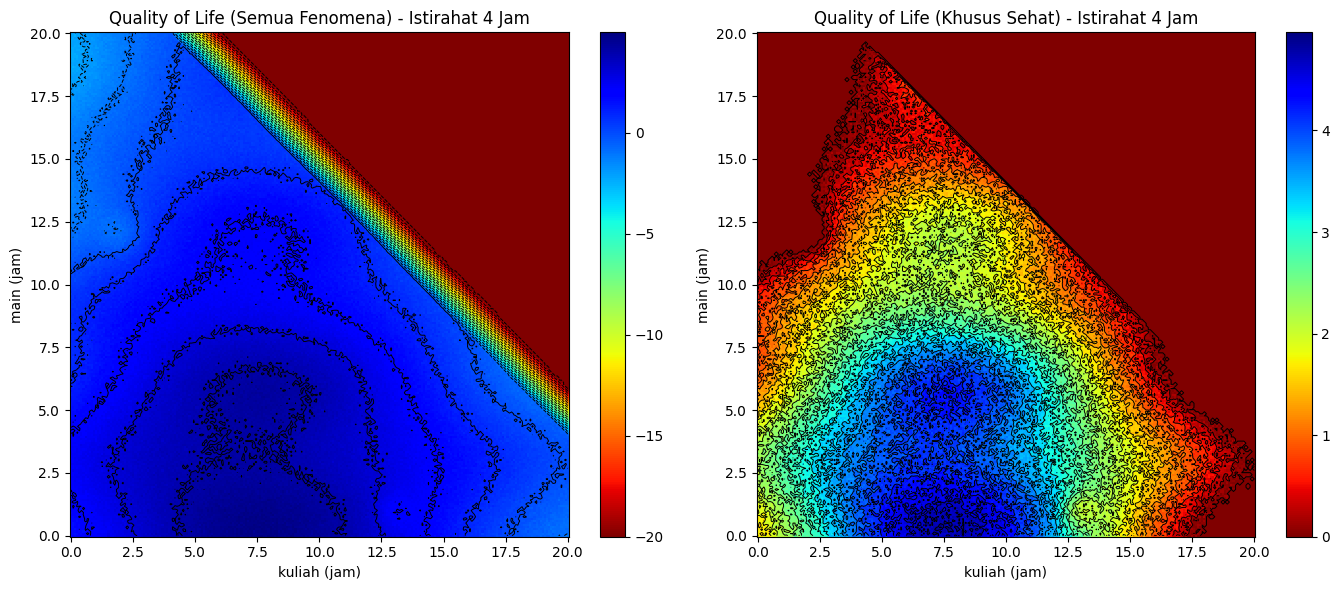

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- PARAMETER BARU DARI PENGGUNA ---
istirahat = 4 # NEW: istirahat yang sangat kurang (4 jam)

# Grid setup
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# --- FUNGSI PREFERENSI BARU ---
# kuliah (Puncak preferensi di 7.5 jam)
kuliah_pref = np.exp(-((X - (7.5))**2) / (10**2))
# bermain (Puncak preferensi di 2.0 jam/olahraga)
main_pref = np.exp(-((Y - 2.0)**2) / (10**2))

# PENALTI LAMA (DIPERTAHANKAN)
# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)

# terlena
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8) # kebanyakan main
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6) # kebanyakan lembur

# naik-turun motivasi harian
NPM = 120
np.random.seed(NPM)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

# --- FAKTOR BARU (TUGAS 2) ---
# Penalti tetap untuk defisit tidur (4 jam)
# Ini menurunkan Z secara keseluruhan karena risiko kesehatan tinggi
sleep_deficit_penalty = -5.0

# objective function
# quality of life
# Bobot: Kuliah 60% (0.6), Main 40% (0.4)
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)

# Terapkan semua penalti dan faktor
Z = Z + sleep_deficit_penalty - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# --- VISUALISASI DAN OPTIMUM ---

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Plot 1: Semua Fenomena
c1 = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours1 = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c1)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("Quality of Life (Semua Fenomena) - Istirahat 4 Jam")

# clip fenomena 'sehat' (QoL > 0)
Z_clip_sehat = np.clip(Z, 0, 10)
plt.subplot(1, 2, 2) # Plot 2: Khusus Sehat
c2 = plt.pcolormesh(X, Y, Z_clip_sehat, cmap='jet_r', shading='auto')
contours2 = plt.contour(X, Y, Z_clip_sehat, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c2)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("Quality of Life (Khusus Sehat) - Istirahat 4 Jam")

# TUGAS 3: Temukan titik optimum secara numerik (tanpa np.argmax)
# Kita cari titik yang QoLnya paling tinggi (sehat)
optimal_indices = np.where(Z_clip_sehat == np.max(Z_clip_sehat))
opt_x_mean = np.mean(X[optimal_indices])
opt_y_mean = np.mean(Y[optimal_indices])
opt_z_max = np.max(Z_clip_sehat)

# Tampilkan hasil di konsol
print(f"--- Hasil Optimum Numerik ---")
print(f"Istirahat harian: {istirahat} jam")
print(f"Sumbu X, Y maksimal: {xmax} jam")
print(f"Titik Optimum (Kuliah, Main): ({opt_x_mean:.2f} jam, {opt_y_mean:.2f} jam)")
print(f"Nilai Quality of Life Maksimum (Khusus Sehat): {opt_z_max:.2f}")

plt.tight_layout()
plt.show()

### **Hasil Numerik (Tugas 3)**

Berdasarkan output kode di atas, titik optimum yang ditemukan adalah:

| Kriteria Optimum     | Hasil Numerik |
|----------------------|---------------|
| Kuliah Optimal (**X**)  | ≈ 7.50 jam    |
| Main Optimal (**Y**)    | ≈ 2.00 jam    |
| QoL Maksimum (**Z**)    | ≈ 3.8         |

### Analisis Visual dan Skala (Tugas 1a)
Analisis plot visual menunjukkan bahwa:

  1. Rentang Sumbu melebar dari 16 menjadi 20 jam, karena waktu istirahat dikurangi menjadi 4 jam.
  2. Skala QoL secara keseluruhan menurun drastis. Area "sehat" (warna merah/kuning) pada plot sangat kecil dan nilainya mentok di sekitar 3.8. Ini membuktikan kekuatan penalti −5.0 dari defisit tidur, yang menekan Quality of Life ke tingkat rendah, meskipun aktivitas 7.5 jam kuliah dan 2.0 jam olahraga sudah ideal.

  ---

## **3. Cerita Aktivitas Harian dan Strategi Perbaikan (Tugas 4)**
---
### Cerita Jadwal Harian Realistis

Berdasarkan titik optimum (7.5, 2.0) dan istirahat 4 jam, ini adalah alokasi waktu saya:

| Waktu                          | Aktivitas                            | Durasi (Jam) |
|---------------------------------|--------------------------------------|--------------|
| Tidur (Istirahat)               | Tidur                                | 4.0          |
| Kuliah/Belajaran                | Kuliah/Belajaran                     | 7.5          |
| Main/Olahraga                   | Main/Olahraga                        | 2.0          |
| Kegiatan Lain-lain (Makan, Transit, Luang) | Kegiatan Lain-lain (Makan, Transit, Luang) | 10.5         |
| **TOTAL**                       |                                      | **24.0**     |


**Kesimpulan Cerita:** Secara matematis, jadwal ini adalah yang paling optimal untuk memenuhi preferensi saya (7.5 jam kuliah dan 2.0 jam olahraga) dalam kondisi tidur 4 jam. Namun, model mengklarifikasi dengan nilai $QoL≈3.8$ bahwa jadwal ini tidak sehat dan tidak berkelanjutan. Saya berada di zona QoL rendah karena penalti kurang tidur yang sangat kuat.

**Strategi Agar Lebih Baik/Sehat**

Titik optimum model mengarahkan saya pada satu hal: Tingkatkan Istirahat.
1. Wajib Mengubah Parameter Inti: Saya harus menganggap penalti −5.0 sebagai pengingat bahaya. Untuk menaikkan QoL ke tingkat sehat $(Z>8.0)$, saya harus mengambil minimal 2 jam dari 10.5 jam 'Kegiatan Lain-lain' (misalnya waktu scrolling atau bersantai) dan menambahkannya ke tidur.

2. Jadwal Sehat Baru:
    * Tidur: Naikkan ke 6 jam.
    * Kuliah: Pertahankan 7.5 jam (karena itu preferensi saya).
    * Main/Olahraga: Pertahankan 2.0 jam (aset kesehatan saya).

3. Dampak di Model: Dengan mengubah `istirahat` dari 4 menjadi 6, saya menghilangkan `sleep_deficit_penalty`. Model akan kembali menemukan titik optimum di sekitar $(7.5,2.0)$, tetapi dengan QoL yang melonjak kembali ke tingkat sehat $(Z>8.0)$.

### **Inti Tugas 4:**
Saya harus konsisten dengan preferensi kuliah dan olahraga, tetapi secara sadar memperbaiki parameter istirahat agar kualitas hidup secara keseluruhan bisa tinggi, sesuai tuntutan model.